<h1>Лабораторна робота №5 <h1>
<h2>Пруніч Сергій МІТ-31<h2>

In [27]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [7]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [9]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/50
27/27 [==============================] - 1s 7ms/step - loss: 13517.1416 - val_loss: 12651.9336
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 13511.7188 - val_loss: 12644.2969
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 13500.1357 - val_loss: 12628.4219
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 13477.4619 - val_loss: 12599.0273
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 13437.5098 - val_loss: 12549.9482
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 13373.9424 - val_loss: 12474.9951
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 13279.5674 - val_loss: 12367.5244
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 13146.9775 - val_loss: 12219.7998
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 12968.0840 - val_loss: 12025.5244
Epoch 10/50
27/27 [===========================

Text(0.5, 0, 'epochs')

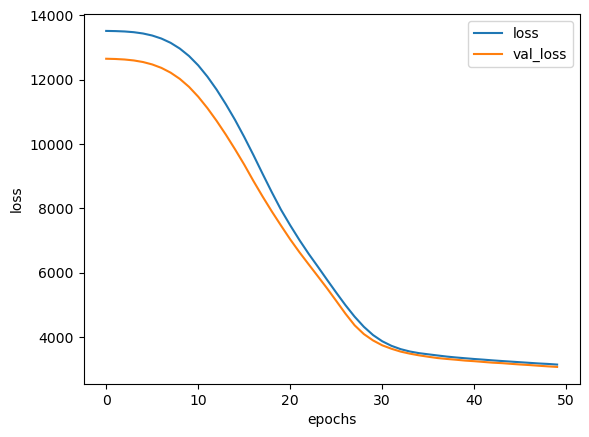

In [21]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Побудова моделі нейронної мережі
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Один нейрон, оскільки це задача регресії
])

# Компіляція моделі
model.compile(optimizer='adam', loss='mean_absolute_error')

# Тренування моделі
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Оцінка моделі на тестовому наборі
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')

# крива втрат
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


Epoch 1/500
27/27 [==============================] - 0s 4ms/step - loss: 3123.0579 - val_loss: 3049.1367
Epoch 2/500
27/27 [==============================] - 0s 3ms/step - loss: 3108.5317 - val_loss: 3029.3774
Epoch 3/500
27/27 [==============================] - 0s 3ms/step - loss: 3091.1360 - val_loss: 3009.6702
Epoch 4/500
27/27 [==============================] - 0s 2ms/step - loss: 3071.3672 - val_loss: 2997.6196
Epoch 5/500
27/27 [==============================] - 0s 3ms/step - loss: 3058.1206 - val_loss: 2978.8491
Epoch 6/500
27/27 [==============================] - 0s 3ms/step - loss: 3037.8662 - val_loss: 2959.2986
Epoch 7/500
27/27 [==============================] - 0s 3ms/step - loss: 3023.0896 - val_loss: 2942.7922
Epoch 8/500
27/27 [==============================] - 0s 3ms/step - loss: 3000.7036 - val_loss: 2925.4500
Epoch 9/500
27/27 [==============================] - 0s 3ms/step - loss: 2984.1711 - val_loss: 2912.3403
Epoch 10/500
27/27 [==============================] - 0

Text(0.5, 0, 'epochs')

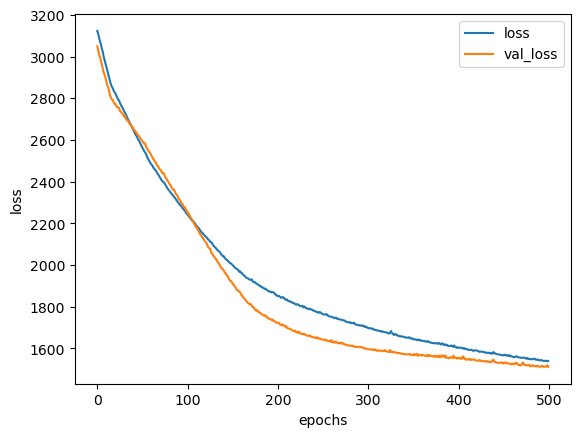

In [22]:
# Тренування моделі
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Оцінка моделі на тестовому наборі
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')

# крива втрат
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


Epoch 1/50
27/27 [==============================] - 1s 7ms/step - loss: 13512.6729 - val_loss: 12635.4824
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 13448.9336 - val_loss: 12490.6768
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 13114.4121 - val_loss: 11862.9600
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 11986.3564 - val_loss: 10198.1035
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 9690.5371 - val_loss: 7767.0542
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 6938.2896 - val_loss: 5764.7295
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 5084.6128 - val_loss: 4503.5786
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 4111.7041 - val_loss: 3852.2056
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 3693.0613 - val_loss: 3464.5093
Epoch 10/50
27/27 [==============================] - 0s 

Text(0.5, 0, 'epochs')

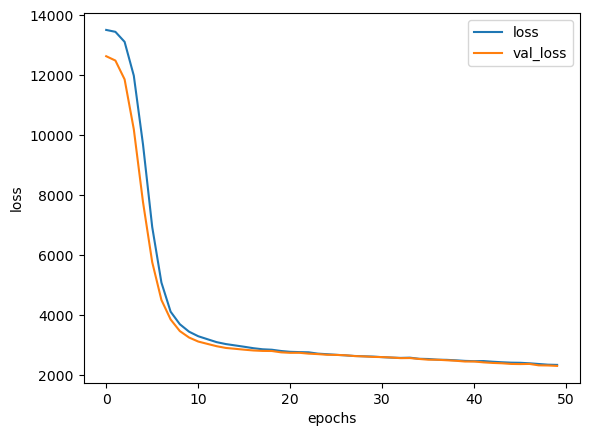

In [24]:
# Побудова моделі нейронної мережі
model = tf.keras.Sequential([
    tf.keras.layers.Dense(254, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Один нейрон, оскільки це задача регресії
])

# Компіляція моделі
model.compile(optimizer='adam', loss='mean_absolute_error')

# Тренування моделі
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Оцінка моделі на тестовому наборі
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')

# крива втрат
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epoch 1/500
27/27 [==============================] - 0s 6ms/step - loss: 2316.7991 - val_loss: 2297.7732
Epoch 2/500
27/27 [==============================] - 0s 3ms/step - loss: 2319.4556 - val_loss: 2260.7871
Epoch 3/500
27/27 [==============================] - 0s 3ms/step - loss: 2300.8625 - val_loss: 2245.5955
Epoch 4/500
27/27 [==============================] - 0s 3ms/step - loss: 2283.7061 - val_loss: 2241.2424
Epoch 5/500
27/27 [==============================] - 0s 3ms/step - loss: 2274.1191 - val_loss: 2213.4956
Epoch 6/500
27/27 [==============================] - 0s 3ms/step - loss: 2261.4321 - val_loss: 2197.6467
Epoch 7/500
27/27 [==============================] - 0s 3ms/step - loss: 2247.2756 - val_loss: 2189.5657
Epoch 8/500
27/27 [==============================] - 0s 3ms/step - loss: 2240.5198 - val_loss: 2176.6189
Epoch 9/500
27/27 [==============================] - 0s 3ms/step - loss: 2224.8826 - val_loss: 2168.4541
Epoch 10/500
27/27 [==============================] - 0

Text(0.5, 0, 'epochs')

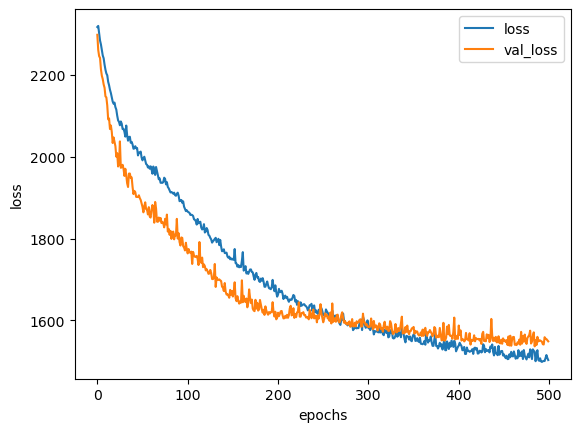

In [25]:
# Тренування моделі
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Оцінка моделі на тестовому наборі
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')

# крива втрат
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

<h5>Отже, найкращого показника mae в 1401 одиницю вдалося досягти при 500 епохах з компілятором Адам при 128, 64, 1 шарах dense<h5>